In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Just some matplotlib tweaks
import matplotlib as mpl

mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 1.5
mpl.rcParams["figure.dpi"] = 200
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('xtick', labelsize='medium')
rc('ytick', labelsize='medium')
rc("axes", labelsize = "large")
def cm2inch(value):
    return value/2.54

In [27]:
def gaussian(x, mu, sigma):
    return 1/np.sqrt(2*np.pi)/sigma*np.exp(-(x-mu)**2 / (2*sigma**2))

In [28]:
x = np.linspace(-3, 3)
tau = 0.5

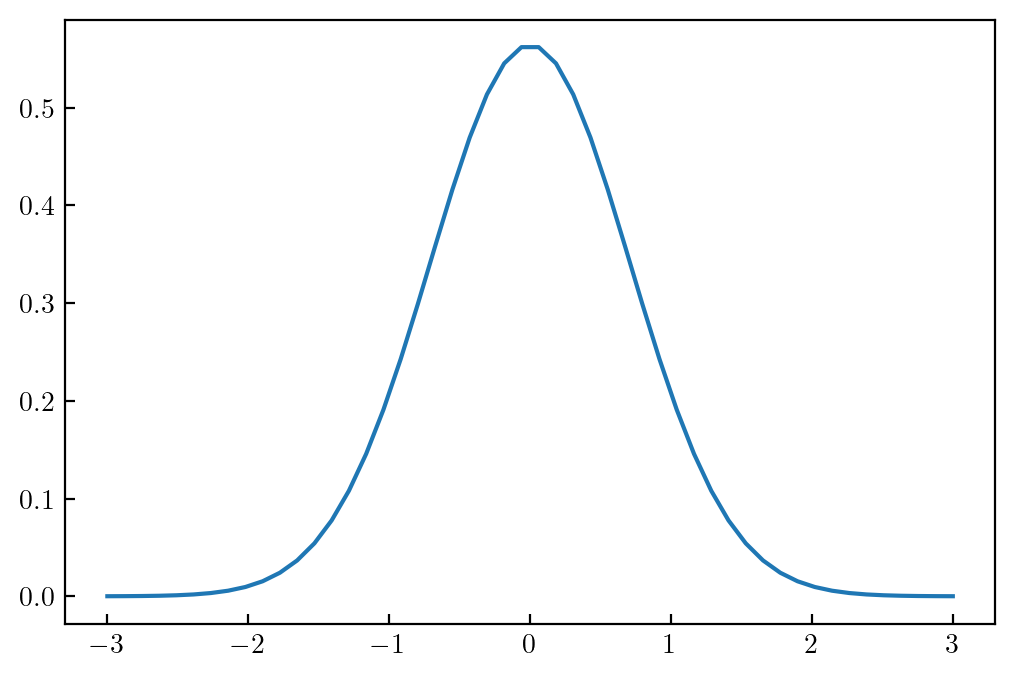

In [29]:
plt.plot(x, gaussian(x,0 , np.sqrt(tau)))

In [40]:
x = np.linspace(-0.2, 0.2, 10000 )

tau = 0.0001
np.trapz(gaussian(x,0 , np.sqrt(tau)),x)

1.0

In [35]:
gaussian(x,0 , np.sqrt(tau))

array([ 5.39909665,  6.33547641,  7.38487866,  8.55093015,  9.8353374 ,
       11.23753549, 12.75436376, 14.37978627, 16.10467529, 17.91667531,
       19.80016383, 21.7363217 , 23.70332285, 25.67664756, 27.62951855,
       29.53345281, 31.35891588, 33.07605958, 34.65551845, 36.06923608,
       37.29128921, 38.29867599, 39.0720351 , 39.59626424, 39.86101053,
       39.86101053, 39.59626424, 39.0720351 , 38.29867599, 37.29128921,
       36.06923608, 34.65551845, 33.07605958, 31.35891588, 29.53345281,
       27.62951855, 25.67664756, 23.70332285, 21.7363217 , 19.80016383,
       17.91667531, 16.10467529, 14.37978627, 12.75436376, 11.23753549,
        9.8353374 ,  8.55093015,  7.38487866,  6.33547641,  5.39909665])

In [7]:
 rdm = np.random.normal(0,np.sqrt(tau), 1000)

In [8]:
def hist(x, bins=15):
    Y, X = np.histogram(x, bins, density=True)
    X = (X[1:] + X[:-1])/2
    return X,Y


In [9]:
X,Y = hist(rdm)

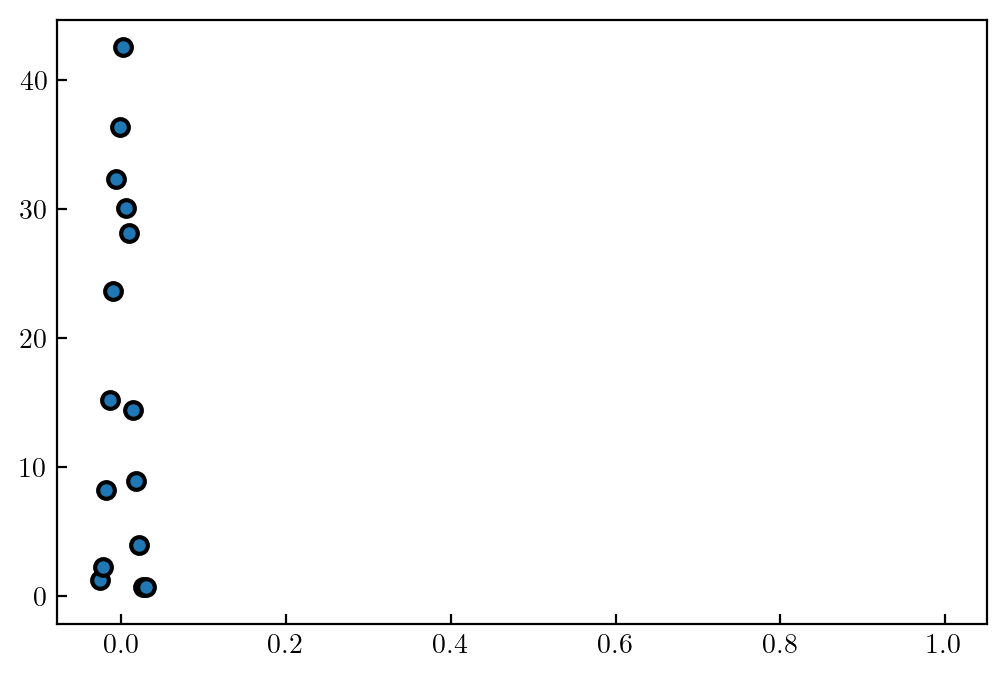

In [10]:
plt.plot(X,Y, "o")
plt.plot(x, gaussian(x,0 , np.sqrt(tau)))

In [80]:
Ns = [*np.arange(10,100,10),*np.arange(100,1000,100), *np.arange(1000,10000,1000),*np.arange(10000,100000,10000), *np.arange(100000,1000000,100000), *np.arange(1000000,10000000,1000000)]

In [81]:
from tqdm import trange

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:41<00:00,  2.08s/it]


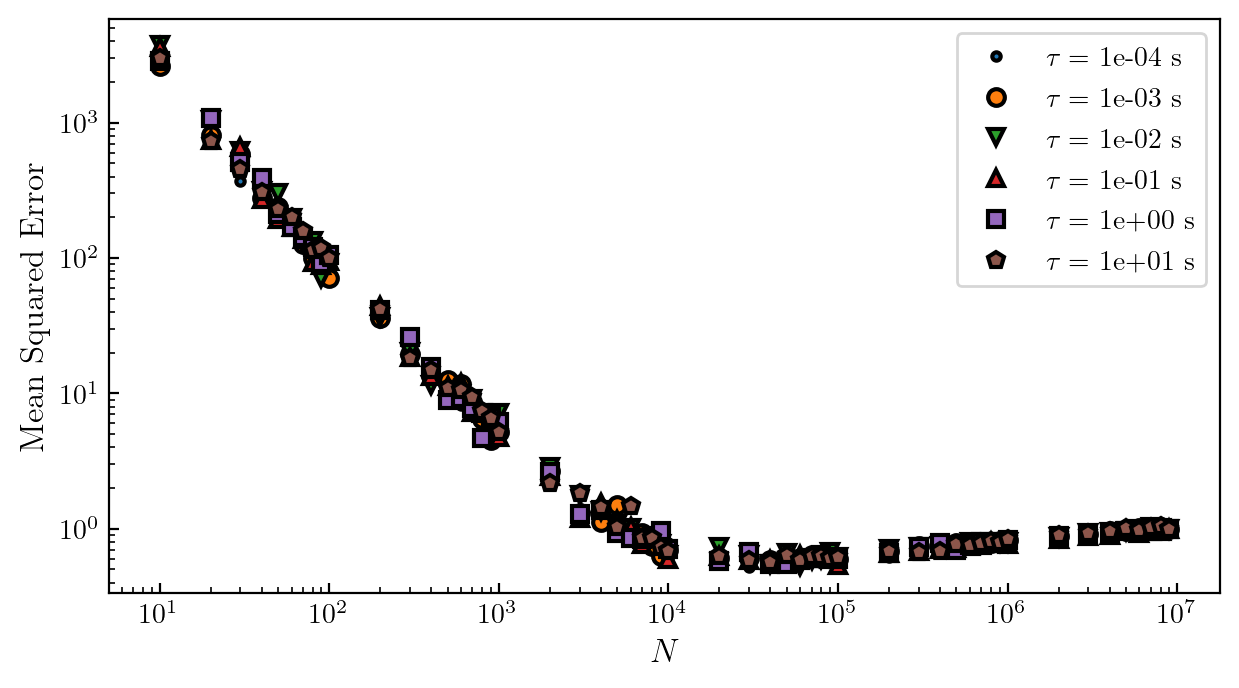

In [112]:
plt.figure(figsize=( cm2inch(16),cm2inch(9)))
taus = [0.0001, 0.001,0.01, 0.1, 1, 10]
sym = [".", "o", "v", "^", "s", "p"]
for j, tau in enumerate(taus):
    errs = np.zeros(len(Ns))
    for _ in trange(20):
        for n,i in enumerate(Ns):
            rdm = np.random.normal(0,np.sqrt(tau), i)
            X,Y = hist(rdm, 10) 
            errs[n] += np.mean((Y - gaussian(X, 0, np.sqrt(tau))) ** 2)
    errs = errs / 10
    plt.loglog(Ns, errs / errs[-1], sym[j] ,label = "$\\tau = $ {:.0e} s".format(tau))
plt.ylabel("Mean Squared Error")
plt.xlabel("$N$")
plt.legend()
plt.tight_layout()
plt.savefig("MSE.pdf")

In [62]:
tau = 0.001
rdm = np.random.normal(0,1/np.sqrt(tau), 1000)
X,Y = hist(rdm, 10) 
x = np.linspace(min(X), max(X), 1000)
gau = gaussian(x, 0, 1/np.sqrt(tau))

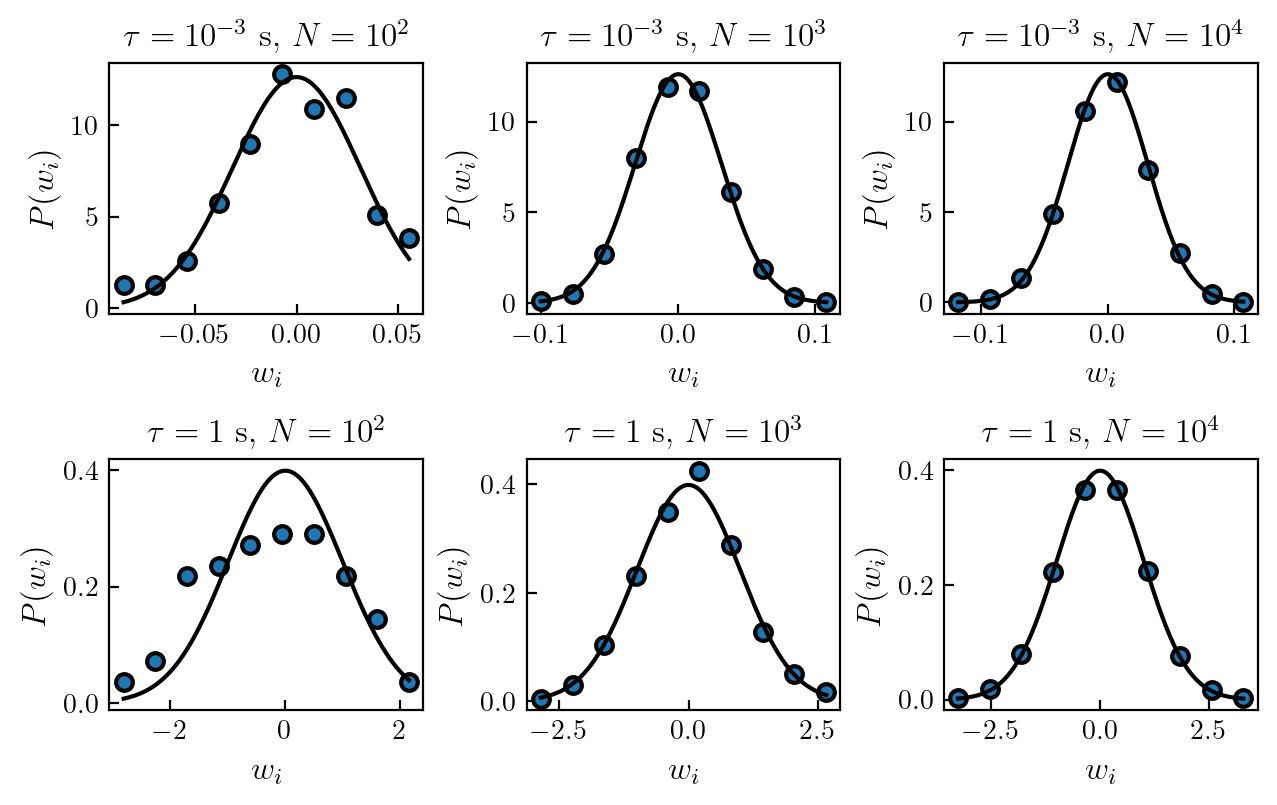

In [111]:
fig3 = plt.figure(figsize = (cm2inch(16),cm2inch(10)))
gs = fig3.add_gridspec(2, 3)

f3_ax1 = fig3.add_subplot(gs[0, 0])
tau = 0.001
rdm = np.random.normal(0,np.sqrt(tau), 100)
X,Y = hist(rdm, 10) 
x = np.linspace(min(X), max(X), 1000)
gau = gaussian(x, 0, np.sqrt(tau))
#plt.text(0.5, 0.5, "$\tau = 0.001$ s, $N$ = 1000")
plt.plot(X,Y, "o")
plt.plot(x,gau, "k")
plt.xlabel("$w_i$")
plt.ylabel("$P(w_i)$")
plt.title("$\\tau = 10^{-3}~ \mathrm{ s, } ~N = 10^2$  ")


f3_ax1 = fig3.add_subplot(gs[0, 1])
tau = 0.001
rdm = np.random.normal(0,np.sqrt(tau), 1000)
X,Y = hist(rdm, 10) 
x = np.linspace(min(X), max(X), 1000)
gau = gaussian(x, 0, np.sqrt(tau))
plt.plot(X,Y, "o")
plt.plot(x,gau, "k")
plt.xlabel("$w_i$")
plt.ylabel("$P(w_i)$")
plt.title("$\\tau = 10^{-3} ~\mathrm{ s, }~ N = 10^3$  ")


f3_ax1 = fig3.add_subplot(gs[0, 2])
tau = 0.001
rdm = np.random.normal(0,np.sqrt(tau), 10000)
X,Y = hist(rdm, 10) 
x = np.linspace(min(X), max(X), 10000)
gau = gaussian(x, 0, np.sqrt(tau))
plt.plot(X,Y, "o")
plt.plot(x,gau, "k")
plt.xlabel("$w_i$")
plt.ylabel("$P(w_i)$")
plt.title("$\\tau = 10^{-3} ~ \mathrm{ s, }~ N = 10^4$  ")


f3_ax1 = fig3.add_subplot(gs[1, 0])
tau = 1
rdm = np.random.normal(0,np.sqrt(tau), 100)
X,Y = hist(rdm, 10) 
x = np.linspace(min(X), max(X), 1000)
gau = gaussian(x, 0, np.sqrt(tau))
plt.plot(X,Y, "o")
plt.plot(x,gau, "k")
plt.xlabel("$w_i$")
plt.ylabel("$P(w_i)$")
plt.title("$\\tau = 1 ~ \mathrm{ s, }~ N = 10^2$  ")



f3_ax1 = fig3.add_subplot(gs[1, 1])
tau = 1
rdm = np.random.normal(0,np.sqrt(tau), 1000)
X,Y = hist(rdm, 10) 
x = np.linspace(min(X), max(X), 1000)
gau = gaussian(x, 0, np.sqrt(tau))
plt.plot(X,Y, "o")
plt.plot(x,gau, "k")
plt.xlabel("$w_i$")
plt.ylabel("$P(w_i)$")
plt.title("$\\tau = 1 ~  \mathrm{ s, } ~N = 10^3$  ")

f3_ax1 = fig3.add_subplot(gs[1, 2])
tau = 1
rdm = np.random.normal(0,np.sqrt(tau), 10000)
X,Y = hist(rdm, 10) 
x = np.linspace(min(X), max(X), 10000)
gau = gaussian(x, 0, np.sqrt(tau))
plt.plot(X,Y, "o")
plt.plot(x,gau, "k")
plt.xlabel("$w_i$")
plt.ylabel("$P(w_i)$")
plt.title("$\\tau = 1 ~\mathrm{ s, }~ N = 10^4$  ")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.savefig("exemple.pdf")

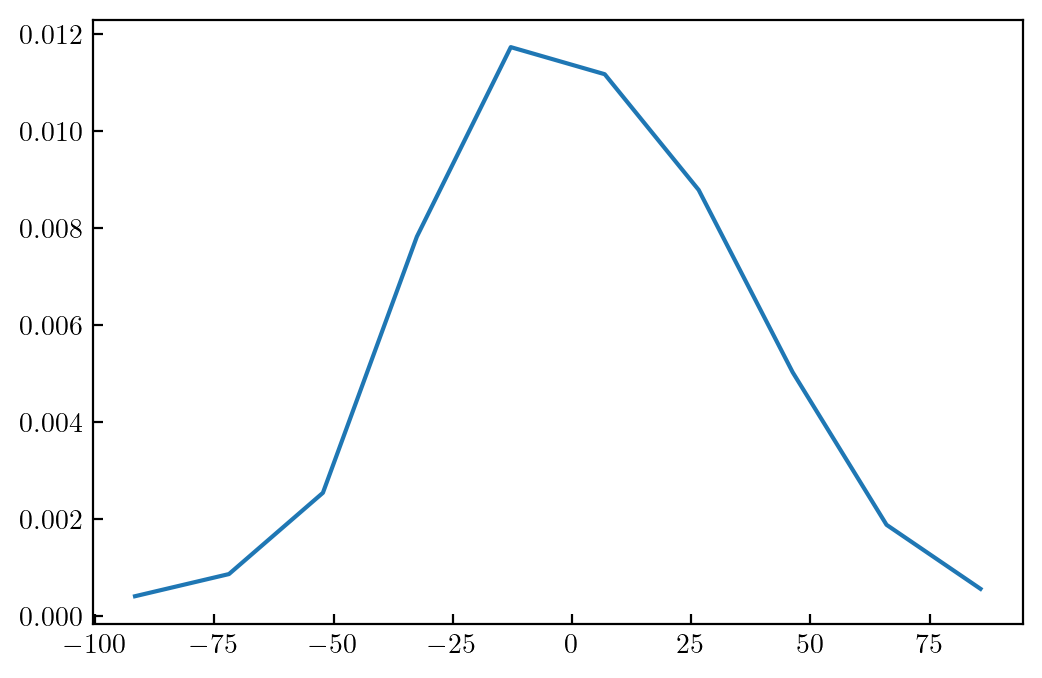

In [58]:
plt.plot(X,Y)

In [59]:
gau = gaussian(X, 0, 1/np.sqrt(tau))

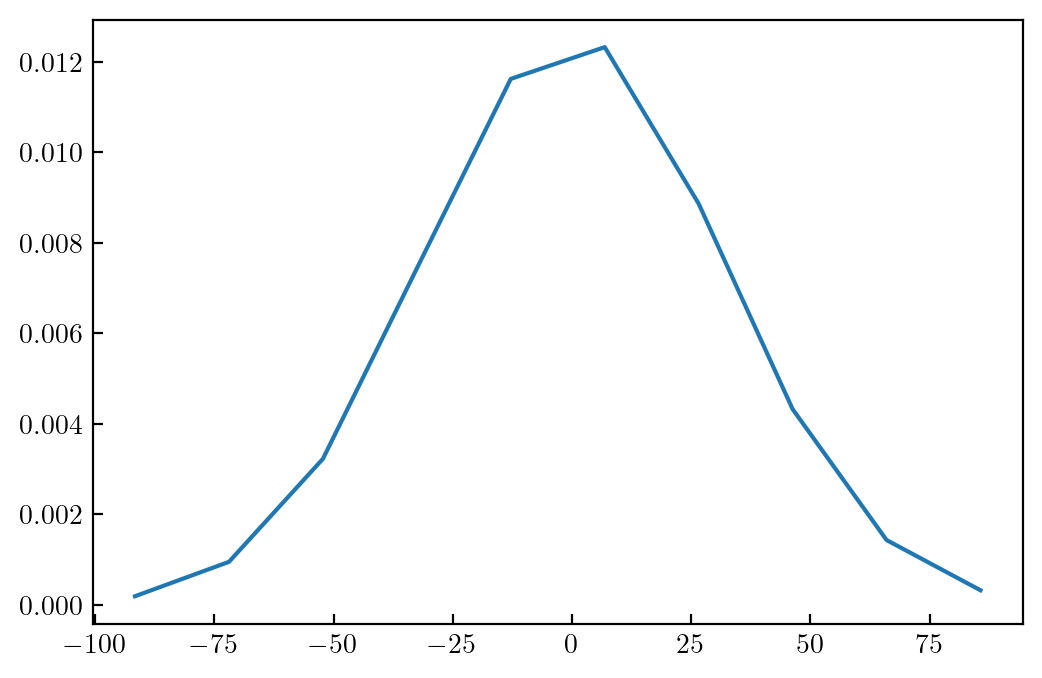

In [60]:
plt.plot(X,gau)

In [61]:
gau

array([0.00018944, 0.00094901, 0.00322472, 0.00743238, 0.01161929,
       0.01232103, 0.00886198, 0.00432344, 0.00143069, 0.00032113])

In [24]:
np.trapz(gau,x )

0.004192361112829939